In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
json_data = []

with open("final.json", "r") as f:
    json_data = json.loads(f.read())

for instance in json_data:
    instance["labels_count"] = len(instance["data"])

In [3]:
data = pd.json_normalize(
    json_data, 
    meta=["chart_type", "chart_title", "labels_count"],
)

In [4]:
data

,chart_type,chart_title,data,labels_count
0,bar,Blood types in Albania,"[{'label': 'O+', 'value': 1048431, 'color': 'r...",2
1,pie,Blood types in Algeria,"[{'label': 'O+', 'value': 17430676, 'color': '...",2
2,bar,Blood types in Argentina,"[{'label': 'O+', 'value': 22239289, 'color': '...",2
3,pie,Blood types in Armenia,"[{'label': 'O+', 'value': 876184, 'color': 'rg...",2
4,bar,Blood types in Australia,"[{'label': 'O+', 'value': 9677254, 'color': 'r...",2
...,...,...,...,...
1386,line,Highest points of apc.us stock,"[{'label': '1986-11-04', 'value': 4.6978}, {'l...",20
1387,line,Highest points of apc.us stock,"[{'label': '1988-01-14', 'value': 5.8413}, {'l...",20
1388,line,Highest points of apc.us stock,"[{'label': '1988-01-29', 'value': 6.1272}, {'l...",20
1389,line,Highest points of apc.us stock,"[{'label': '1988-08-22', 'value': 6.3083}, {'l...",20


In [10]:
chart_type_distribution = data.groupby('chart_type').size().reset_index(name='quantity')

# Display the result
chart_type_distribution

,chart_type,quantity
0,bar,474
1,line,445
2,pie,472


In [11]:
labels_count_distribution = data.groupby('labels_count').size().reset_index(name='quantity')

# Display the result
labels_count_distribution

,labels_count,quantity
0,2,74
1,3,72
2,4,72
3,5,72
4,6,73
5,7,71
6,8,70
7,9,75
8,10,73
9,11,72


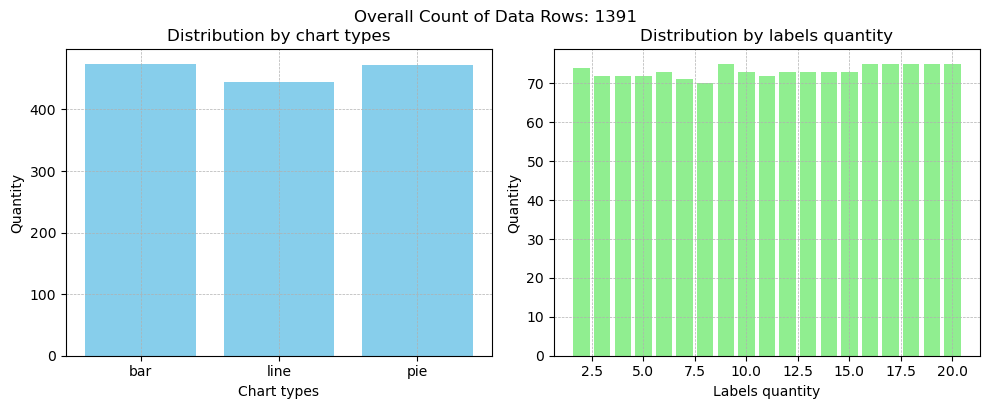

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

plt.figtext(0.5, 0.98, f"Overall Count of Data Rows: {len(data)}", ha="center", fontsize=12)

ax1.bar(chart_type_distribution['chart_type'], chart_type_distribution['quantity'], color='skyblue')
ax1.set_xlabel('Chart types')
ax1.set_ylabel('Quantity')
ax1.set_title('Distribution by chart types')
ax1.grid(True, linestyle='--', linewidth=0.5)

ax2.bar(labels_count_distribution['labels_count'], labels_count_distribution['quantity'], color='lightgreen')
ax2.set_xlabel('Labels quantity')
ax2.set_ylabel('Quantity')
ax2.set_title('Distribution by labels quantity')
ax2.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()

# Display the plots
plt.show()